# Emotion Mining on IPhone 15 Pro Max

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!python -m spacy download en_core_web_md

2024-02-02 00:07:07.951916: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 00:07:07.951978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 00:07:07.952950: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 00:07:07.957953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 00:07:08.857649: W tensorflow/compiler/tf2

In [ ]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews = pd.read_csv('reviews.csv')
reviews

,Rating,Title,Review
0,5.0,5.0 out of 5 stars\nGood Mobile (If you have b...,As I was aware that what I need and what I was...
1,5.0,5.0 out of 5 stars\nAmazing Lightning fast phone,The phone is really good it had some overheati...
2,5.0,5.0 out of 5 stars\nBest Smart Phone ever,It’s a fantastic phone…the feel and comfort in...
3,5.0,5.0 out of 5 stars\nNam hi kafi hai,Ultimate performance but some bug issue in 17....
4,5.0,5.0 out of 5 stars\nAwesome camera and best qu...,I recently switched from android to iphone. So...
...,...,...,...
56,5.0,5.0 out of 5 stars\nBeast Gadget with PROS CONS,Pros :Light weighted ~ My XR weighted more tha...
57,5.0,5.0 out of 5 stars\nWorth the upgrade,The aluminium has made the phone very light we...
58,5.0,5.0 out of 5 stars\nLove this pro max,best iphone ever used
59,1.0,1.0 out of 5 stars\n12345santhosh,Compare to iphone 14 pro max 15 pro max is ver...


# Data Exploration

#### Number of Words

In [ ]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,As I was aware that what I need and what I was...,118
1,The phone is really good it had some overheati...,78
2,It’s a fantastic phone…the feel and comfort in...,50
3,Ultimate performance but some bug issue in 17....,28
4,I recently switched from android to iphone. So...,18


#### Number of characters

In [ ]:
reviews['character_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','character_count']].head()

,Review,character_count
0,As I was aware that what I need and what I was...,638.0
1,The phone is really good it had some overheati...,415.0
2,It’s a fantastic phone…the feel and comfort in...,295.0
3,Ultimate performance but some bug issue in 17....,170.0
4,I recently switched from android to iphone. So...,105.0


#### Number of numerics

In [ ]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,As I was aware that what I need and what I was...,2
1,The phone is really good it had some overheati...,0
2,It’s a fantastic phone…the feel and comfort in...,0
3,Ultimate performance but some bug issue in 17....,0
4,I recently switched from android to iphone. So...,0


#### Number of Uppercase words

In [ ]:
reviews['upper_case'] = reviews['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
reviews[['Review','upper_case']].head()

,Review,upper_case
0,As I was aware that what I need and what I was...,7
1,The phone is really good it had some overheati...,2
2,It’s a fantastic phone…the feel and comfort in...,0
3,Ultimate performance but some bug issue in 17....,2
4,I recently switched from android to iphone. So...,1


#### Number of Rare Words

In [ ]:
freq = pd.Series(' '.join(reviews['Review']).split()).value_counts()[-10:]
freq

badlo…..    1
Redmi       1
economic    1
candy       1
crush…..    1
saal        1
badlme      1
se          1
acha        1
Thanks      1
dtype: int64

###  Spelling correction

In [ ]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Is I was aware that what I need and what I was...
1    The phone is really good it had some overheari...
2    It’s a fantastic phone…the feel and comfort in...
3    Ultimate performance but some bug issue in 17....
4    I recently switched from andros to phone. To i...
Name: Review, dtype: object

In [ ]:
TextBlob(reviews['Review'][3]).ngrams(1)

[WordList(['Ultimate']),
 WordList(['performance']),
 WordList(['but']),
 WordList(['some']),
 WordList(['bug']),
 WordList(['issue']),
 WordList(['in']),
 WordList(['17.2.1']),
 WordList(['update']),
 WordList(['and']),
 WordList(['FB']),
 WordList(['is']),
 WordList(['not']),
 WordList(['functioning']),
 WordList(['properly….😏😏😏😏😏Lot']),
 WordList(['of']),
 WordList(['BUG']),
 WordList(['issues']),
 WordList(['are']),
 WordList(['experienced']),
 WordList(['in']),
 WordList(['this']),
 WordList(['phone']),
 WordList(['and']),
 WordList(['needs']),
 WordList(['to']),
 WordList(['correct']),
 WordList(['it'])]

In [ ]:
TextBlob(reviews['Review'][2]).ngrams(2)

[WordList(['It', '’']),
 WordList(['’', 's']),
 WordList(['s', 'a']),
 WordList(['a', 'fantastic']),
 WordList(['fantastic', 'phone…the']),
 WordList(['phone…the', 'feel']),
 WordList(['feel', 'and']),
 WordList(['and', 'comfort']),
 WordList(['comfort', 'in']),
 WordList(['in', 'hand']),
 WordList(['hand', 'is']),
 WordList(['is', 'awesome…looks']),
 WordList(['awesome…looks', 'stunning…also']),
 WordList(['stunning…also', 'the']),
 WordList(['the', 'brand']),
 WordList(['brand', 'appeal']),
 WordList(['appeal', 'of']),
 WordList(['of', 'Apple']),
 WordList(['Apple', 'is']),
 WordList(['is', 'fabulous']),
 WordList(['fabulous', 'Camera']),
 WordList(['Camera', 'is']),
 WordList(['is', 'the']),
 WordList(['the', 'best']),
 WordList(['best', 'performance']),
 WordList(['performance', 'is']),
 WordList(['is', 'over']),
 WordList(['over', 'the']),
 WordList(['the', 'top…really']),
 WordList(['top…really', 'fast']),
 WordList(['fast', 'and']),
 WordList(['and', 'the']),
 WordList(['the', '

In [ ]:
TextBlob(reviews['Review'][4]).ngrams(3)

[WordList(['I', 'recently', 'switched']),
 WordList(['recently', 'switched', 'from']),
 WordList(['switched', 'from', 'android']),
 WordList(['from', 'android', 'to']),
 WordList(['android', 'to', 'iphone']),
 WordList(['to', 'iphone', 'So']),
 WordList(['iphone', 'So', 'i']),
 WordList(['So', 'i', 'am']),
 WordList(['i', 'am', 'liking']),
 WordList(['am', 'liking', 'the']),
 WordList(['liking', 'the', 'good']),
 WordList(['the', 'good', 'audio']),
 WordList(['good', 'audio', 'quality']),
 WordList(['audio', 'quality', 'camera']),
 WordList(['quality', 'camera', 'and']),
 WordList(['camera', 'and', 'everything'])]

# Text Preprocessing

In [ ]:
reviews = [str(Review).strip() for Review in reviews.Review if isinstance(Review, (str, float))]
reviews = [Review for Review in reviews if Review]  # removes empty strings, because they are considered in Python as False
print(reviews[0:10])

["As I was aware that what I need and what I was paying for, I needed a quality mobile with best hardware and software combination.I need the OS to be clean without any bloatware which I got.I don't play games. For moderate use of Social media, whatsapp, youtube, audible (audio books), music while exercising, Battery life is around 2 days or sometimes more than 2 days. If you are a gamer or use mobile a lot you might need to charge your mobile everyday.Camera is good. So far the pictures I took the quality is good.Not explore the processor's capacity yet but Never hanged or never will for me (not a heavy user so won't be a problem).", 'The phone is really good it had some overheating issue as heard but not faced any it was due to software update now it is all fixed I still did not had any issue regarding overheating. The phone is really fast and the battery life is awesome. The new action button is really handy and useful. The camera is the best camera an iPhone ever had the photos are

In [ ]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"As I was aware that what I need and what I was paying for, I needed a quality mobile with best hardware and software combination.I need the OS to be clean without any bloatware which I got.I don't play games. For moderate use of Social media, whatsapp, youtube, audible (audio books), music while exercising, Battery life is around 2 days or sometimes more than 2 days. If you are a gamer or use mobile a lot you might need to charge your mobile everyday.Camera is good. So far the pictures I took the quality is good.Not explore the processor's capacity yet but Never hanged or never will for me (not a heavy user so won't be a problem). The phone is really good it had some overheating issue as heard but not faced any it was due to software update now it is all fixed I still did not had any issue regarding overheating. The phone is really fast and the battery life is awesome. The new action button is really handy and useful. The camera is the best camera an iPhone ever had the photos are stu

In [ ]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles=True)
reviews_tokens=tokenizer.tokenize(reviews_text)
print(reviews_tokens)

['As', 'I', 'was', 'aware', 'that', 'what', 'I', 'need', 'and', 'what', 'I', 'was', 'paying', 'for', ',', 'I', 'needed', 'a', 'quality', 'mobile', 'with', 'best', 'hardware', 'and', 'software', 'combination', '.', 'I', 'need', 'the', 'OS', 'to', 'be', 'clean', 'without', 'any', 'bloatware', 'which', 'I', 'got', '.', 'I', "don't", 'play', 'games', '.', 'For', 'moderate', 'use', 'of', 'Social', 'media', ',', 'whatsapp', ',', 'youtube', ',', 'audible', '(', 'audio', 'books', ')', ',', 'music', 'while', 'exercising', ',', 'Battery', 'life', 'is', 'around', '2', 'days', 'or', 'sometimes', 'more', 'than', '2', 'days', '.', 'If', 'you', 'are', 'a', 'gamer', 'or', 'use', 'mobile', 'a', 'lot', 'you', 'might', 'need', 'to', 'charge', 'your', 'mobile', 'everyday.Camera', 'is', 'good', '.', 'So', 'far', 'the', 'pictures', 'I', 'took', 'the', 'quality', 'is', 'good.Not', 'explore', 'the', "processor's", 'capacity', 'yet', 'but', 'Never', 'hanged', 'or', 'never', 'will', 'for', 'me', '(', 'not', 'a'

In [ ]:
# Again Joining the list into one string/text
reviews_tokens_text=' '.join(reviews_tokens)
reviews_tokens_text

"As I was aware that what I need and what I was paying for , I needed a quality mobile with best hardware and software combination . I need the OS to be clean without any bloatware which I got . I don't play games . For moderate use of Social media , whatsapp , youtube , audible ( audio books ) , music while exercising , Battery life is around 2 days or sometimes more than 2 days . If you are a gamer or use mobile a lot you might need to charge your mobile everyday.Camera is good . So far the pictures I took the quality is good.Not explore the processor's capacity yet but Never hanged or never will for me ( not a heavy user so won't be a problem ) . The phone is really good it had some overheating issue as heard but not faced any it was due to software update now it is all fixed I still did not had any issue regarding overheating . The phone is really fast and the battery life is awesome . The new action button is really handy and useful . The camera is the best camera an iPhone ever h

In [ ]:
# Remove Punctuations
no_punc_text = reviews_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'As I was aware that what I need and what I was paying for  I needed a quality mobile with best hardware and software combination  I need the OS to be clean without any bloatware which I got  I dont play games  For moderate use of Social media  whatsapp  youtube  audible  audio books   music while exercising  Battery life is around 2 days or sometimes more than 2 days  If you are a gamer or use mobile a lot you might need to charge your mobile everydayCamera is good  So far the pictures I took the quality is goodNot explore the processors capacity yet but Never hanged or never will for me  not a heavy user so wont be a problem   The phone is really good it had some overheating issue as heard but not faced any it was due to software update now it is all fixed I still did not had any issue regarding overheating  The phone is really fast and the battery life is awesome  The new action button is really handy and useful  The camera is the best camera an iPhone ever had the photos are stunni

In [ ]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'As I was aware that what I need and what I was paying for  I needed a quality mobile with best hardware and software combination  I need the OS to be clean without any bloatware which I got  I dont play games  For moderate use of Social media  whatsapp  youtube  audible  audio books   music while exercising  Battery life is around 2 days or sometimes more than 2 days  If you are a gamer or use mobile a lot you might need to charge your mobile everydayCamera is good  So far the pictures I took the quality is goodNot explore the processors capacity yet but Never hanged or never will for me  not a heavy user so wont be a problem   The phone is really good it had some overheating issue as heard but not faced any it was due to software update now it is all fixed I still did not had any issue regarding overheating  The phone is really fast and the battery life is awesome  The new action button is really handy and useful  The camera is the best camera an iPhone ever had the photos are stunni

In [ ]:
from nltk.tokenize import word_tokenize
reviews_tokens=word_tokenize(no_url_text)
print(reviews_tokens)

['As', 'I', 'was', 'aware', 'that', 'what', 'I', 'need', 'and', 'what', 'I', 'was', 'paying', 'for', 'I', 'needed', 'a', 'quality', 'mobile', 'with', 'best', 'hardware', 'and', 'software', 'combination', 'I', 'need', 'the', 'OS', 'to', 'be', 'clean', 'without', 'any', 'bloatware', 'which', 'I', 'got', 'I', 'dont', 'play', 'games', 'For', 'moderate', 'use', 'of', 'Social', 'media', 'whatsapp', 'youtube', 'audible', 'audio', 'books', 'music', 'while', 'exercising', 'Battery', 'life', 'is', 'around', '2', 'days', 'or', 'sometimes', 'more', 'than', '2', 'days', 'If', 'you', 'are', 'a', 'gamer', 'or', 'use', 'mobile', 'a', 'lot', 'you', 'might', 'need', 'to', 'charge', 'your', 'mobile', 'everydayCamera', 'is', 'good', 'So', 'far', 'the', 'pictures', 'I', 'took', 'the', 'quality', 'is', 'goodNot', 'explore', 'the', 'processors', 'capacity', 'yet', 'but', 'Never', 'hanged', 'or', 'never', 'will', 'for', 'me', 'not', 'a', 'heavy', 'user', 'so', 'wont', 'be', 'a', 'problem', 'The', 'phone', 'is

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Tokens count
len(reviews_tokens)

2289

In [ ]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in reviews_tokens if not word in my_stop_words]
print(no_stop_tokens)

['As', 'aware', 'need', 'paying', 'needed', 'quality', 'mobile', 'best', 'hardware', 'software', 'combination', 'need', 'OS', 'clean', 'without', 'bloatware', 'got', 'dont', 'play', 'games', 'For', 'moderate', 'use', 'Social', 'media', 'whatsapp', 'youtube', 'audible', 'audio', 'books', 'music', 'exercising', 'Battery', 'life', 'around', '2', 'days', 'sometimes', '2', 'days', 'If', 'gamer', 'use', 'mobile', 'lot', 'might', 'need', 'charge', 'mobile', 'everydayCamera', 'good', 'So', 'far', 'pictures', 'took', 'quality', 'goodNot', 'explore', 'processors', 'capacity', 'yet', 'Never', 'hanged', 'never', 'heavy', 'user', 'wont', 'problem', 'The', 'phone', 'really', 'good', 'overheating', 'issue', 'heard', 'faced', 'due', 'software', 'update', 'fixed', 'still', 'issue', 'regarding', 'overheating', 'The', 'phone', 'really', 'fast', 'battery', 'life', 'awesome', 'The', 'new', 'action', 'button', 'really', 'handy', 'useful', 'The', 'camera', 'best', 'camera', 'iPhone', 'ever', 'photos', 'stunn

In [ ]:
# Normalizing the data
lower_words=[Review.lower() for Review in no_stop_tokens]
print(lower_words[100:200])

['best', 'camera', 'iphone', 'ever', 'photos', 'stunning', 'spectacular', '…', 'satisfied', 'phone', 'it', '’', 'fantastic', 'phone', '…', 'feel', 'comfort', 'hand', 'awesome', '…', 'looks', 'stunning', '…', 'also', 'brand', 'appeal', 'apple', 'fabulous', 'camera', 'best', 'performance', 'top', '…', 'really', 'fast', 'games', 'play', 'play', 'station', '’', '…', 'phone', '…', 'also', 'video', 'quality', 'nice', '…', 'ultimate', 'performance', 'bug', 'issue', '172', '1', 'update', 'fb', 'functioning', 'properly', '…', '😏', '😏', '😏', 'lot', 'bug', 'issues', 'experienced', 'phone', 'needs', 'correct', 'recently', 'switched', 'android', 'iphone', 'so', 'liking', 'good', 'audio', 'quality', 'camera', 'everything', 'the', 'box', 'different', 'colour', 'order', 'black', 'titanium', 'box', 'black', 'titanium', 'phone', 'natural', 'titanium', 'inside', 'its', 'heart', 'wrenching', 'trust', 'shaken', 'the']


In [ ]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['best', 'camera', 'iphon', 'ever', 'photo', 'stun', 'spectacular', '…', 'satisfi', 'phone', 'it', '’', 'fantast', 'phone', '…', 'feel', 'comfort', 'hand', 'awesom', '…', 'look', 'stun', '…', 'also', 'brand', 'appeal', 'appl', 'fabul', 'camera', 'best', 'perform', 'top', '…', 'realli', 'fast', 'game', 'play', 'play', 'station', '’', '…', 'phone', '…', 'also', 'video', 'qualiti', 'nice', '…', 'ultim', 'perform', 'bug', 'issu', '172', '1', 'updat', 'fb', 'function', 'properli', '…', '😏', '😏', '😏', 'lot', 'bug', 'issu', 'experienc', 'phone', 'need', 'correct', 'recent', 'switch', 'android', 'iphon', 'so', 'like', 'good', 'audio', 'qualiti', 'camera', 'everyth', 'the', 'box', 'differ', 'colour', 'order', 'black', 'titanium', 'box', 'black', 'titanium', 'phone', 'natur', 'titanium', 'insid', 'it', 'heart', 'wrench', 'trust', 'shaken', 'the']


In [ ]:
# Lemmatization
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
print(doc)

as aware need paying needed quality mobile best hardware software combination need os clean without bloatware got dont play games for moderate use social media whatsapp youtube audible audio books music exercising battery life around 2 days sometimes 2 days if gamer use mobile lot might need charge mobile everydaycamera good so far pictures took quality goodnot explore processors capacity yet never hanged never heavy user wont problem the phone really good overheating issue heard faced due software update fixed still issue regarding overheating the phone really fast battery life awesome the new action button really handy useful the camera best camera iphone ever photos stunning spectacular … satisfied phone it ’ fantastic phone … feel comfort hand awesome … looks stunning … also brand appeal apple fabulous camera best performance top … really fast games play play station ’ … phone … also video quality nice … ultimate performance bug issue 172 1 update fb functioning properly … 😏 😏 😏 lo

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['as', 'aware', 'need', 'pay', 'need', 'quality', 'mobile', 'good', 'hardware', 'software', 'combination', 'need', 'os', 'clean', 'without', 'bloatware', 'get', 'do', 'not', 'play', 'game', 'for', 'moderate', 'use', 'social', 'medium', 'whatsapp', 'youtube', 'audible', 'audio', 'book', 'music', 'exercise', 'battery', 'life', 'around', '2', 'day', 'sometimes', '2', 'day', 'if', 'gamer', 'use', 'mobile', 'lot', 'might', 'need', 'charge', 'mobile', 'everydaycamera', 'good', 'so', 'far', 'picture', 'take', 'quality', 'goodnot', 'explore', 'processor', 'capacity', 'yet', 'never', 'hang', 'never', 'heavy', 'user', 'will', 'not', 'problem', 'the', 'phone', 'really', 'good', 'overheating', 'issue', 'hear', 'face', 'due', 'software', 'update', 'fix', 'still', 'issue', 'regard', 'overheat', 'the', 'phone', 'really', 'fast', 'battery', 'life', 'awesome', 'the', 'new', 'action', 'button', 'really', 'handy', 'useful', 'the', 'camera', 'good', 'camera', 'iphone', 'ever', 'photo', 'stun', 'spectacula

In [ ]:
cleaned_reviews=' '.join(lemmas)
cleaned_reviews

"as aware need pay need quality mobile good hardware software combination need os clean without bloatware get do not play game for moderate use social medium whatsapp youtube audible audio book music exercise battery life around 2 day sometimes 2 day if gamer use mobile lot might need charge mobile everydaycamera good so far picture take quality goodnot explore processor capacity yet never hang never heavy user will not problem the phone really good overheating issue hear face due software update fix still issue regard overheat the phone really fast battery life awesome the new action button really handy useful the camera good camera iphone ever photo stun spectacular … satisfied phone it ' fantastic phone … feel comfort hand awesome … look stunning … also brand appeal apple fabulous camera good performance top … really fast game play play station ' … phone … also video quality nice … ultimate performance bug issue 172 1 update fb function properly … 😏 😏 😏 lot bug issue experience phon

# Feature Extaction

## 1) using Countvectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [ ]:
print(cv.vocabulary_)

{'as': 62, 'aware': 69, 'need': 369, 'pay': 417, 'quality': 457, 'mobile': 355, 'good': 230, 'hardware': 249, 'software': 520, 'combination': 132, 'os': 400, 'clean': 129, 'without': 620, 'bloatware': 90, 'get': 224, 'do': 167, 'not': 383, 'play': 432, 'game': 220, 'for': 213, 'moderate': 358, 'use': 585, 'social': 519, 'medium': 346, 'whatsapp': 614, 'youtube': 633, 'audible': 65, 'audio': 66, 'book': 93, 'music': 363, 'exercise': 188, 'battery': 79, 'life': 322, 'around': 61, 'day': 153, 'sometimes': 522, 'if': 276, 'gamer': 221, 'lot': 332, 'might': 350, 'charge': 121, 'everydaycamera': 185, 'so': 517, 'far': 202, 'picture': 431, 'take': 546, 'goodnot': 233, 'explore': 195, 'processor': 448, 'capacity': 114, 'yet': 631, 'never': 372, 'hang': 245, 'heavy': 259, 'user': 589, 'will': 617, 'problem': 446, 'the': 554, 'phone': 427, 'really': 464, 'overheating': 406, 'issue': 297, 'hear': 254, 'face': 198, 'due': 173, 'update': 580, 'fix': 211, 'still': 530, 'regard': 470, 'overheat': 405

In [ ]:
print(cv.get_feature_names_out()[100:200])

['budget' 'bug' 'build' 'but' 'button' 'buy' 'buyable' 'cable' 'cahiye'
 'cam' 'camera' 'cameraand' 'can' 'candy' 'capacity' 'capturing' 'car'
 'care' 'case' 'cemra' 'chance' 'charge' 'charger' 'charging'
 'chargingdurability' 'charmcon' 'cheap' 'check' 'clarity' 'clean' 'color'
 'colour' 'combination' 'come' 'comfort' 'company' 'compare' 'compelling'
 'completely' 'contain' 'cool' 'correct' 'cost' 'could' 'cover'
 'coverbattery' 'critic' 'criticism' 'crush' 'cycle' 'daily' 'damage'
 'date' 'day' 'decent' 'decide' 'def' 'defective' 'deliver' 'design'
 'detail' 'device' 'difference' 'different' 'diffrent' 'disign' 'display'
 'do' 'doest' 'dolby' 'don' 'doob' 'doubt' 'due' 'duke' 'early' 'earth'
 'economic' 'ek' 'enhanced' 'enjoy' 'essence' 'etc' 'even' 'ever'
 'everydaycamera' 'everything' 'evil' 'exercise' 'exist' 'exoensicenot'
 'expect' 'expensive' 'experience' 'experienceperform' 'explore' 'extra'
 'fabulous' 'face' 'faced']


In [ ]:
print(reviewscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(reviewscv.toarray().shape)

(1467, 634)


## 2) CountVectorizer with N-grams (Bigrams & Trigrams)

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '1010' '14' '15' '80' 'also' 'amazon' 'android' 'app' 'apple'
 'around' 'awesome' 'bad' 'battery' 'box' 'but' 'buy' 'camera' 'charge'
 'charger' 'could' 'cover' 'day' 'device' 'do' 'even' 'expensive'
 'experience' 'fast' 'feel' 'fix' 'game' 'get' 'go' 'good' 'hai' 'hand'
 'heat' 'heating' 'heavy' 'hmm' 'hold' 'if' 'iphone' 'issue' 'it' 'life'
 'like' 'load' 'look' 'lot' 'love' 'make' 'max' 'medium' 'might' 'mobile'
 'model' 'much' 'natural' 'need' 'never' 'new' 'nice' 'no' 'not' 'nothing'
 'package' 'performance' 'phone' 'play' 'pm' 'premium' 'pro' 'problem'
 'product' 'purchase' 'quality' 'really' 'review' 'screen' 'since'
 'software' 'strong' 'take' 'the' 'thing' 'till' 'titanium' 'upgrade'
 'use' 'user' 'very' 'video' 'watch' 'weight' 'well' 'worth' 'xr' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 3)TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features = TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram = tfidfv_ngram_max_features.fit_transform(lemmas)

In [ ]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['10' '100' '1010' '1030' '10k' '11' '128' '13' '14' '15' '16' '160'
 '160k' '170' '172' '18' '20w' '2426' '245' '256' '27' '2lacs' '2lakh'
 '2month' '3040' '333' '3540' '390' '4k' '50k' '60000' '60fps' '61' '70'
 '80' '826' 'aate' 'ab' 'accha' 'acha' 'action' 'already' 'also' 'always'
 'amazing' 'amazon' 'and' 'android' 'androidit' 'antenna' 'app' 'appeal'
 'apple' 'area' 'areabattery' 'around' 'as' 'assembly' 'assure' 'audio'
 'aur' 'avfyi' 'aware' 'awesome' 'back' 'backup' 'bad' 'badiya' 'badlme'
 'badlo' 'basic' 'bass' 'battery' 'be' 'beast' 'beat' 'bekar' 'beyond'
 'bhaut' 'bhi' 'bin' 'bit' 'black' 'bloatware' 'boast' 'boluhaa' 'book'
 'box' 'brand' 'break' 'brilliant' 'bro' 'bt' 'budget' 'bug' 'build' 'but'
 'button' 'buy' 'buyable' 'cable' 'cahiye' 'cam' 'camera' 'cameraand'
 'can' 'candy' 'capacity' 'capturing' 'car' 'care' 'case' 'cemra' 'chance'
 'charge' 'charger' 'charging' 'chargingdurability' 'charmcon' 'cheap'
 'check' 'clarity' 'clean' 'color' 'colour' 'combination' 'co

# Generating Wordcloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

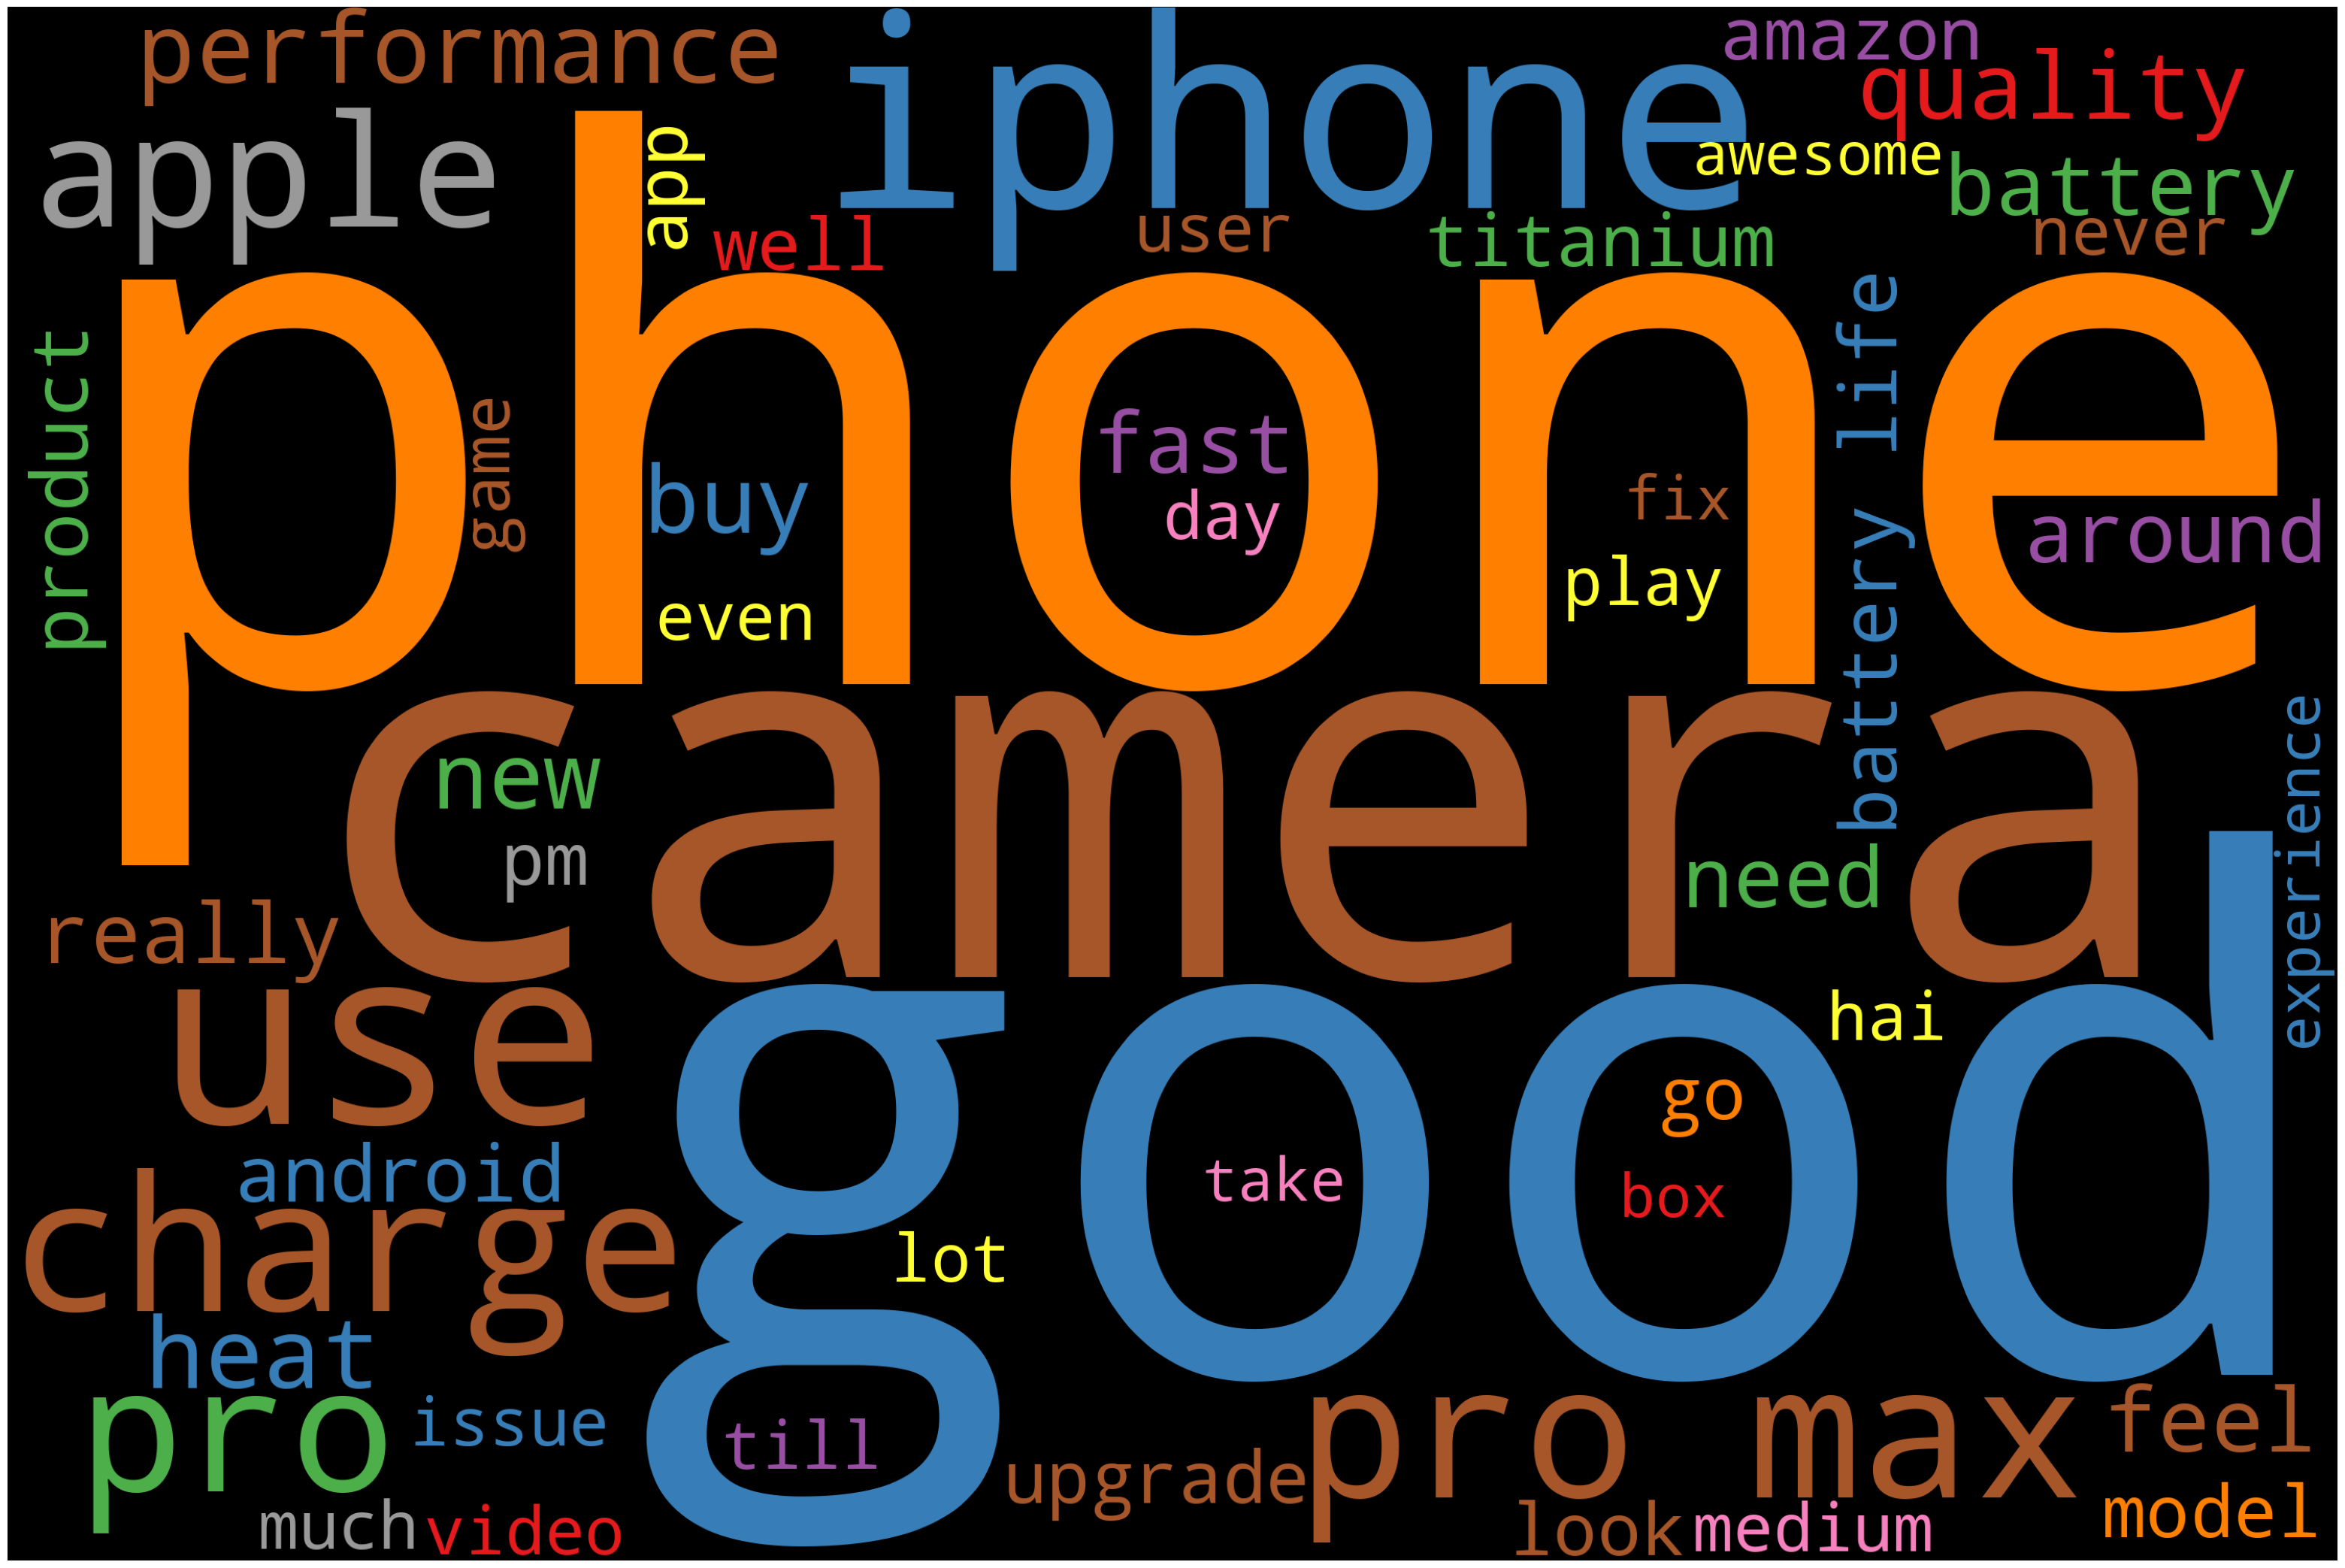

In [ ]:
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(cleaned_reviews)
plot_cloud(wordcloud)

#     

# Named Entity Recognition (NER)

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=cleaned_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

the DET
camera NOUN
good ADJ
camera NOUN
iphone NOUN
ever ADV
photo NOUN
stun NOUN
spectacular ADJ
… PUNCT
satisfied ADJ
phone NOUN
it PRON
' PUNCT
fantastic ADJ
phone NOUN
… PUNCT
feel VERB
comfort NOUN
hand PROPN
awesome ADJ
… PUNCT
look VERB
stunning ADJ
… PUNCT
also ADV
brand NOUN
appeal NOUN
apple NOUN
fabulous ADJ
camera NOUN
good ADJ
performance NOUN
top NOUN
… PUNCT
really ADV
fast ADJ
game NOUN
play VERB
play NOUN
station NOUN
' PUNCT
… PUNCT
phone NOUN
… PUNCT
also ADV
video NOUN
quality NOUN
nice ADJ
… PUNCT
ultimate ADJ
performance NOUN
bug NOUN
issue NOUN
172 NUM
1 NUM
update NOUN
fb ADJ
function NOUN
properly ADV
… PUNCT
😏 PROPN
😏 PROPN
😏 PROPN
lot NOUN
bug NOUN
issue NOUN
experience NOUN
phone NOUN
need NOUN
correct NOUN
recently ADV
switch VERB
android ADJ
iphone NOUN
so ADV
like INTJ
good ADJ
audio ADJ
quality NOUN
camera NOUN
everything PRON
the DET
box NOUN
different ADJ
colour ADJ
order NOUN
black ADJ
titanium NOUN
box NOUN
black ADJ
titanium NOUN
phone NOUN
natural

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['heart', 'wrench', 'trust', 'shake', 'phone', 'look', 'usedit', 'happen', 'apple', 'product', 'shock', 'upgrade', 'apple', 'max', 'camera', 'feel', 'fall', 'deliver', 'experience', 'use', 'pro', 'seem', 'incentive', 'make', 'camera', 'improvement', 'capturing', 'detail', 'clarity', 'feature', 'max', 'offer', 'leap', 'term', 'innovation', 'find', 'version', 'hand', 'variant', 'boast', 'screen', 'bit', 'unwieldyin', 'essence', 'device', 'camera', 'enjoy', 'model', 'upgrade', 'feel', 'phone', 'cameraand', 'glass', 'andit', 'iphone', 'pack', 's', 'tamper', 'package', 'package', 'tamper', 'package', 'contain', 'phone', 'phone', 'look', 'camera', 'quality', 'product', 'use', 'device', 'work', 'heating', 'issue', 'upgrade', 'camera', 'buy', 'upgrade', 'decide', 'get', 'worth', 'battery', 'hit', 'problem', 'watch', 'video', 'charge', 'st', 'iphone', 'performance', 'simplicity', 'product', 'performance', 'charge', 'camera', 'quality', 'lightning', 'titanium', 'tantrum', 'charge']


In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,37
1,camera,20
2,use,18
3,charge,16
4,iphone,16
5,battery,15
6,max,12
7,get,11
8,performance,11
9,heat,11


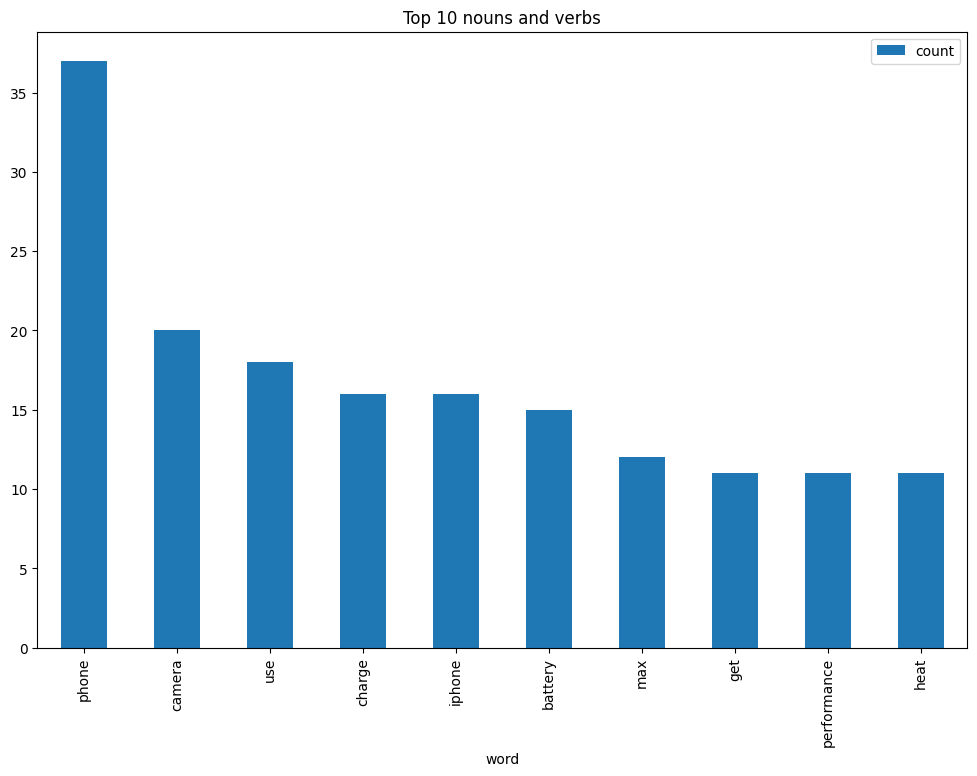

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

["As I was aware that what I need and what I was paying for, I needed a quality mobile with best hardware and software combination.I need the OS to be clean without any bloatware which I got.I don't play games.",
 'For moderate use of Social media, whatsapp, youtube, audible (audio books), music while exercising, Battery life is around 2 days or sometimes more than 2 days.',
 'If you are a gamer or use mobile a lot you might need to charge your mobile everyday.Camera is good.',
 "So far the pictures I took the quality is good.Not explore the processor's capacity yet but Never hanged or never will for me (not a heavy user so won't be a problem).",
 'The phone is really good it had some overheating issue as heard but not faced any it was due to software update now it is all fixed I still did not had any issue regarding overheating.',
 'The phone is really fast and the battery life is awesome.',
 'The new action button is really handy and useful.',
 'The camera is the best camera an iPhon

In [ ]:
sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,As I was aware that what I need and what I was...
1,"For moderate use of Social media, whatsapp, yo..."
2,If you are a gamer or use mobile a lot you mig...
3,So far the pictures I took the quality is good...
4,The phone is really good it had some overheati...
...,...
90,pls make sure you have a good cover.
91,I saw videos the back panel is weak due to dif...
92,"I don't play games, so cannot review on the he..."
93,The aluminium has made the phone very light we...


In [ ]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
affinity_scores = affin.set_index('word')['value'].to_dict()

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='awesome')

4

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     4
1     0
2     3
3     1
4     3
     ..
90    3
91   -2
92    0
93   -1
94    9
Name: sentiment_value, Length: 95, dtype: int64

In [ ]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     40
1     26
2     20
3     32
4     36
      ..
90     8
91    21
92    15
93    66
94    32
Name: word_count, Length: 95, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
41,Don’t worry about negative reviews go and get ...,-5,24
43,Inko sb sasta mai cahiye😂😂😂 this image quality...,-4,20
61,We Know Nowadays There was so much hate spread...,-3,33
47,the speed the camera the new ios justtt superb...,-2,38
38,What a stupid phone.,-2,4
...,...,...,...
21,But the phone is looking good Camera quality i...,9,28
80,It is lighter.Good performance ~ Very smoothGo...,11,59
73,Best camera everything feels like pro Outstand...,16,38
8,I am satisfied with the phone.. It’s a fantast...,20,25


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    95.000000
mean      2.452632
std       4.353449
min      -5.000000
25%       0.000000
50%       0.000000
75%       4.000000
max      20.000000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,"For moderate use of Social media, whatsapp, yo...",0,26
10,I recently switched from android to iphone.,0,7
12,The box had a different colour.,0,6
13,I order black Titanium....box was black Titani...,0,28
19,There's a tampered package within a new package.,0,8
20,The tampered package contained the phone.,0,6
22,No heating issues or such.,-1,5
27,Very powerful battery too Hitting problem watc...,0,17
31,It gets charged with the Apple 20W USB-C Power...,0,12
32,It also charges well using my 3-year-old Mi wi...,0,12


In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,As I was aware that what I need and what I was...,4,40
2,If you are a gamer or use mobile a lot you mig...,3,20
3,So far the pictures I took the quality is good...,1,32
4,The phone is really good it had some overheati...,3,36
5,The phone is really fast and the battery life ...,4,11
6,The new action button is really handy and useful.,2,9
7,The camera is the best camera an iPhone ever h...,7,16
8,I am satisfied with the phone.. It’s a fantast...,20,25
9,"Camera is the best, performance is over the to...",8,59
11,"So i am liking the good audio quality, camera ...",5,11


In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,As I was aware that what I need and what I was...,4,40,0
1,"For moderate use of Social media, whatsapp, yo...",0,26,1
2,If you are a gamer or use mobile a lot you mig...,3,20,2
3,So far the pictures I took the quality is good...,1,32,3
4,The phone is really good it had some overheati...,3,36,4
...,...,...,...,...
90,pls make sure you have a good cover.,3,8,90
91,I saw videos the back panel is weak due to dif...,-2,21,91
92,"I don't play games, so cannot review on the he...",0,15,92
93,The aluminium has made the phone very light we...,-1,66,93


<Axes: xlabel='sentiment_value', ylabel='Density'>

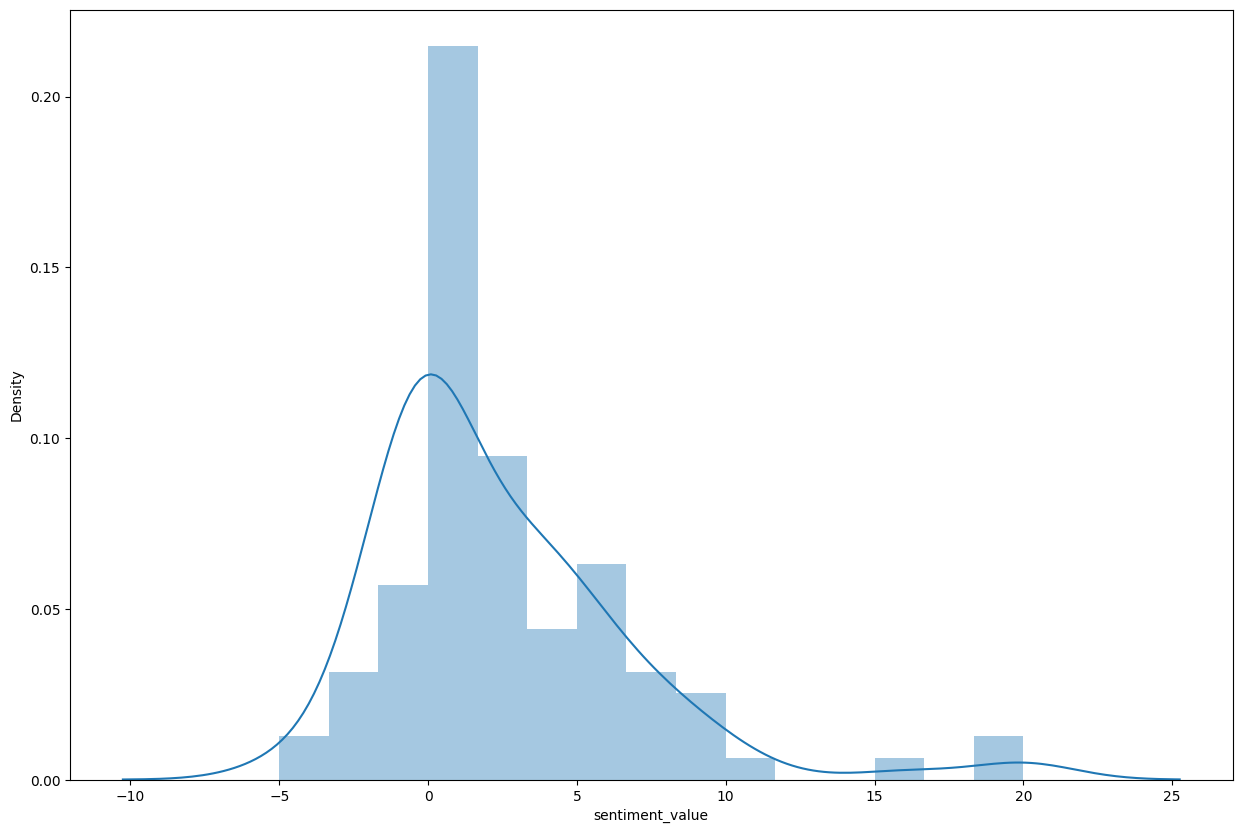

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

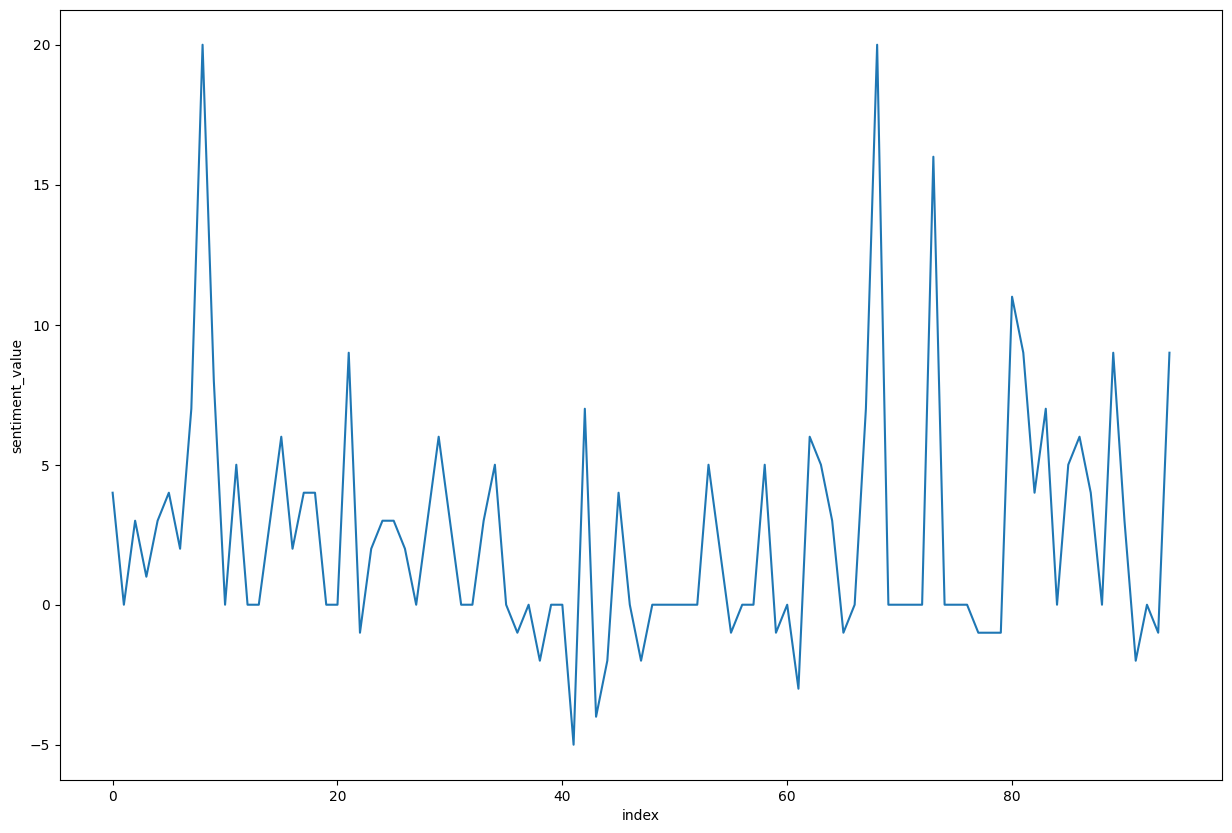

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

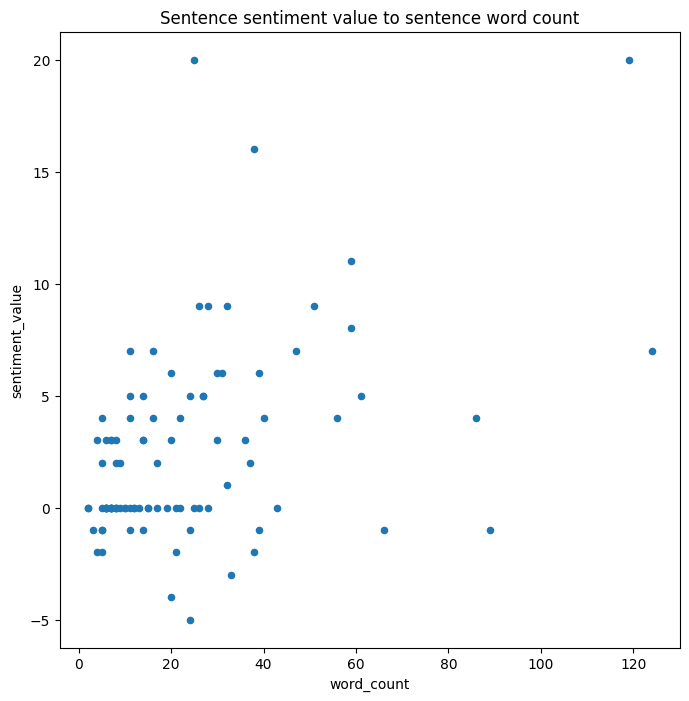

In [ ]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

# Using different Sentiment analyzing techniques



## 1.Manually Defining the Sentiments

In [ ]:
def get_sentiment(sentiment_value):
    if sentiment_value < 0:
        return 'Negative'
    elif sentiment_value >0:
        return 'Positive'

    else:
        return 'Neutral'

In [ ]:
# Apply the get_sentiment function to the sentiment_value column
sent_df['Sentiment'] = sent_df['sentiment_value'].apply(get_sentiment)
sent_df

,sentence,sentiment_value,word_count,index,Sentiment
0,As I was aware that what I need and what I was...,4,40,0,Positive
1,"For moderate use of Social media, whatsapp, yo...",0,26,1,Neutral
2,If you are a gamer or use mobile a lot you mig...,3,20,2,Positive
3,So far the pictures I took the quality is good...,1,32,3,Positive
4,The phone is really good it had some overheati...,3,36,4,Positive
...,...,...,...,...,...
90,pls make sure you have a good cover.,3,8,90,Positive
91,I saw videos the back panel is weak due to dif...,-2,21,91,Negative
92,"I don't play games, so cannot review on the he...",0,15,92,Neutral
93,The aluminium has made the phone very light we...,-1,66,93,Negative


In [ ]:
# re-ordering the columns
sent_df = sent_df.iloc[:, [3,0,2,1,4]]
sent_df

,index,sentence,word_count,sentiment_value,Sentiment
0,0,As I was aware that what I need and what I was...,40,4,Positive
1,1,"For moderate use of Social media, whatsapp, yo...",26,0,Neutral
2,2,If you are a gamer or use mobile a lot you mig...,20,3,Positive
3,3,So far the pictures I took the quality is good...,32,1,Positive
4,4,The phone is really good it had some overheati...,36,3,Positive
...,...,...,...,...,...
90,90,pls make sure you have a good cover.,8,3,Positive
91,91,I saw videos the back panel is weak due to dif...,21,-2,Negative
92,92,"I don't play games, so cannot review on the he...",15,0,Neutral
93,93,The aluminium has made the phone very light we...,66,-1,Negative


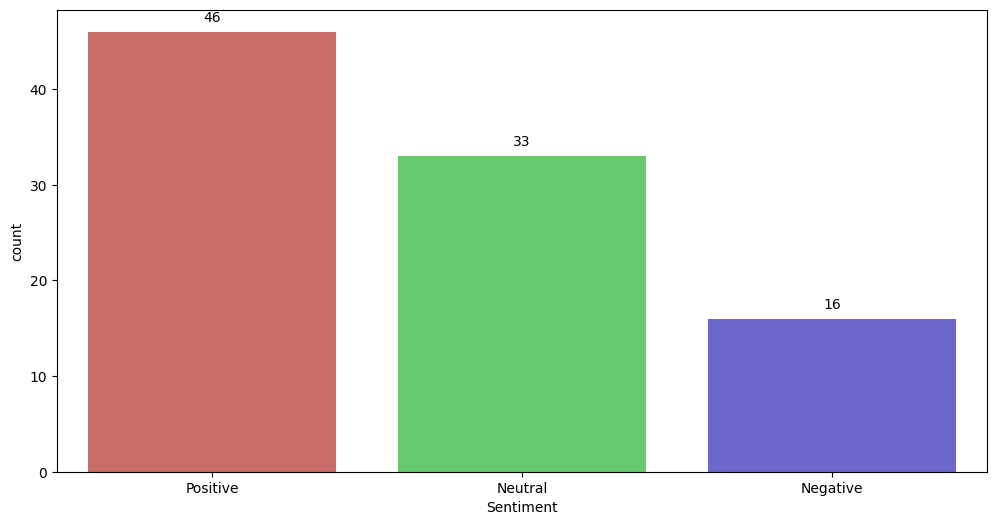

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sentiment', data=sent_df, palette='hls')

# Annotate each bar with its count as integer
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#            

## 2. Using NLTK's Sentiment Intensity Analyzer(SIA)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sent_df1 = sent_df.copy()
sent_df1

,index,sentence,word_count,sentiment_value,Sentiment
0,0,As I was aware that what I need and what I was...,40,4,Positive
1,1,"For moderate use of Social media, whatsapp, yo...",26,0,Neutral
2,2,If you are a gamer or use mobile a lot you mig...,20,3,Positive
3,3,So far the pictures I took the quality is good...,32,1,Positive
4,4,The phone is really good it had some overheati...,36,3,Positive
...,...,...,...,...,...
90,90,pls make sure you have a good cover.,8,3,Positive
91,91,I saw videos the back panel is weak due to dif...,21,-2,Negative
92,92,"I don't play games, so cannot review on the he...",15,0,Neutral
93,93,The aluminium has made the phone very light we...,66,-1,Negative


In [ ]:
sent_df1.drop(['sentiment_value','Sentiment'], axis = 1, inplace = True)
sent_df1

,index,sentence,word_count
0,0,As I was aware that what I need and what I was...,40
1,1,"For moderate use of Social media, whatsapp, yo...",26
2,2,If you are a gamer or use mobile a lot you mig...,20
3,3,So far the pictures I took the quality is good...,32
4,4,The phone is really good it had some overheati...,36
...,...,...,...
90,90,pls make sure you have a good cover.,8
91,91,I saw videos the back panel is weak due to dif...,21
92,92,"I don't play games, so cannot review on the he...",15
93,93,The aluminium has made the phone very light we...,66


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

# Apply sentiment analysis to the 'sentence' column and create 'sentiment_SIA' and 'sentiment_score' columns
sent_df1['Sentiment_score'] = sent_df1['sentence'].apply(analyze_sentiment)
sent_df1['Sentiment_SIA'] = sent_df1['Sentiment_score'].apply(lambda score: "Positive" if score >= 0.05 else ("Negative" if score <= -0.05 else "Neutral"))

sent_df1

,index,sentence,word_count,Sentiment_score,Sentiment_SIA
0,0,As I was aware that what I need and what I was...,40,0.7063,Positive
1,1,"For moderate use of Social media, whatsapp, yo...",26,0.0000,Neutral
2,2,If you are a gamer or use mobile a lot you mig...,20,0.4404,Positive
3,3,So far the pictures I took the quality is good...,32,0.0000,Neutral
4,4,The phone is really good it had some overheati...,36,0.2724,Positive
...,...,...,...,...,...
90,90,pls make sure you have a good cover.,8,0.6705,Positive
91,91,I saw videos the back panel is weak due to dif...,21,-0.4404,Negative
92,92,"I don't play games, so cannot review on the he...",15,-0.0608,Negative
93,93,The aluminium has made the phone very light we...,66,0.7269,Positive


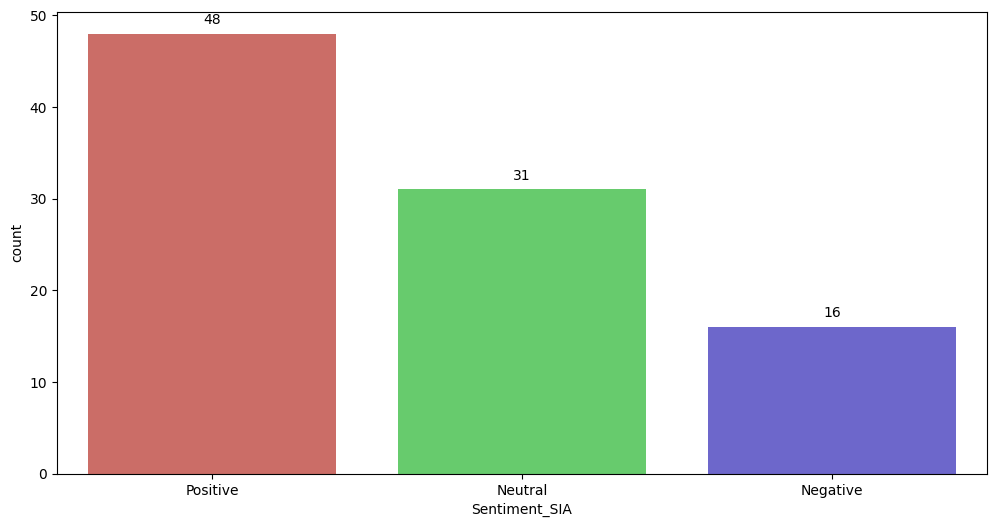

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sentiment_SIA', data=sent_df1, palette='hls')

# Annotate each bar with its count as integer
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#     

## 3. Using TextBlob

In [ ]:
sent_df2 = sent_df.copy()
sent_df2

,index,sentence,word_count,sentiment_value,Sentiment
0,0,As I was aware that what I need and what I was...,40,4,Positive
1,1,"For moderate use of Social media, whatsapp, yo...",26,0,Neutral
2,2,If you are a gamer or use mobile a lot you mig...,20,3,Positive
3,3,So far the pictures I took the quality is good...,32,1,Positive
4,4,The phone is really good it had some overheati...,36,3,Positive
...,...,...,...,...,...
90,90,pls make sure you have a good cover.,8,3,Positive
91,91,I saw videos the back panel is weak due to dif...,21,-2,Negative
92,92,"I don't play games, so cannot review on the he...",15,0,Neutral
93,93,The aluminium has made the phone very light we...,66,-1,Negative


In [ ]:
sent_df2.drop(['sentiment_value','Sentiment'], axis = 1, inplace = True)
sent_df2

,index,sentence,word_count
0,0,As I was aware that what I need and what I was...,40
1,1,"For moderate use of Social media, whatsapp, yo...",26
2,2,If you are a gamer or use mobile a lot you mig...,20
3,3,So far the pictures I took the quality is good...,32
4,4,The phone is really good it had some overheati...,36
...,...,...,...
90,90,pls make sure you have a good cover.,8
91,91,I saw videos the back panel is weak due to dif...,21
92,92,"I don't play games, so cannot review on the he...",15
93,93,The aluminium has made the phone very light we...,66


In [ ]:
import pandas as pd
from textblob import TextBlob

def get_sentiment_and_score(text):
    analysis = TextBlob(text)
    sentiment = 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'
    return pd.Series([analysis.sentiment.polarity, sentiment], index=['Sentiment_Score', 'Sentiment_textblob'])

# Apply sentiment analysis and create new columns 'Sentiment_Score' and 'Sentiment_textblob'
sent_df2[['Sentiment_Score', 'Sentiment_textblob']] = sent_df2['sentence'].apply(get_sentiment_and_score)

sent_df2


,index,sentence,word_count,Sentiment_Score,Sentiment_textblob
0,0,As I was aware that what I need and what I was...,40,0.538889,Positive
1,1,"For moderate use of Social media, whatsapp, yo...",26,0.177778,Positive
2,2,If you are a gamer or use mobile a lot you mig...,20,0.700000,Positive
3,3,So far the pictures I took the quality is good...,32,0.100000,Positive
4,4,The phone is really good it had some overheati...,36,0.225000,Positive
...,...,...,...,...,...
90,90,pls make sure you have a good cover.,8,0.600000,Positive
91,91,I saw videos the back panel is weak due to dif...,21,-0.080000,Negative
92,92,"I don't play games, so cannot review on the he...",15,0.000000,Neutral
93,93,The aluminium has made the phone very light we...,66,-0.085238,Negative


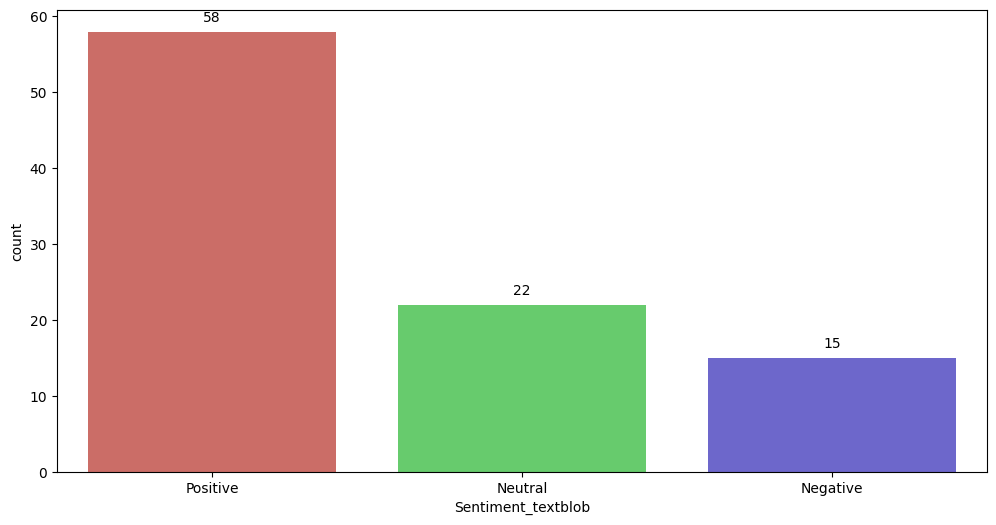

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sentiment_textblob', data=sent_df2, palette='hls')

# Annotate each bar with its count as integer
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()